In [2]:
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [37]:
# First we read the dataset
dataset = pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [43]:
# We then take a closer look at each variable of the dataset
dataset.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.484305,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


In [38]:
# We need to convert all the objects into integers for the model
dataset['sex'] = dataset['sex'].map({'male': 1,'female': 0})
dataset['smoker'] = dataset['smoker'].map({'yes': 1,'no': 0})
dataset['region'] = dataset['region'].map({'southwest': 0,'southeast': 1, 'northwest': 2, 'northeast': 3 })

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2,10600.55
1334,18,0,31.9,0,0,3,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,0,2007.95


In [44]:
# We divide the dataset into training (80%) and testing (20%)
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [45]:
# We pop the objective variable expenses which is the one we're going to predict 
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [48]:
train_dataset.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [63]:
# We create the model with two dense layers and one final layer that gives us the output
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# We compile the model using mse loss function which is good for linear regression problems
model.compile(
  optimizer='adam',
  loss='mse',
  metrics=['mae','mse']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# Finally, we train the model
epochs = 2000

model.fit(
  x=train_dataset,
  y=train_labels,
  epochs=epochs,
)

Epoch 1/2000
34/34 [==============================] - 1s 1ms/step - loss: 313653440.0000 - mae: 13037.4805 - mse: 313653440.0000
Epoch 2/2000
34/34 [==============================] - 0s 1ms/step - loss: 311718400.0000 - mae: 12967.7178 - mse: 311718400.0000
Epoch 3/2000
34/34 [==============================] - 0s 2ms/step - loss: 306918208.0000 - mae: 12792.2178 - mse: 306918208.0000
Epoch 4/2000
34/34 [==============================] - 0s 1ms/step - loss: 295691136.0000 - mae: 12382.4570 - mse: 295691136.0000
Epoch 5/2000
34/34 [==============================] - 0s 1ms/step - loss: 274935680.0000 - mae: 11563.9023 - mse: 274935680.0000
Epoch 6/2000
34/34 [==============================] - 0s 1ms/step - loss: 243982880.0000 - mae: 10307.9961 - mse: 243982880.0000
Epoch 7/2000
34/34 [==============================] - 0s 1ms/step - loss: 206379440.0000 - mae: 8854.5273 - mse: 206379440.0000
Epoch 8/2000
34/34 [==============================] - 0s 1ms/step - loss: 170188496.0000 - mae: 76

9/9 - 0s - loss: 32501138.0000 - mae: 3259.9805 - mse: 32501138.0000 - 129ms/epoch - 14ms/step
Testing set Mean Abs Error: 3259.98 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 967us/step


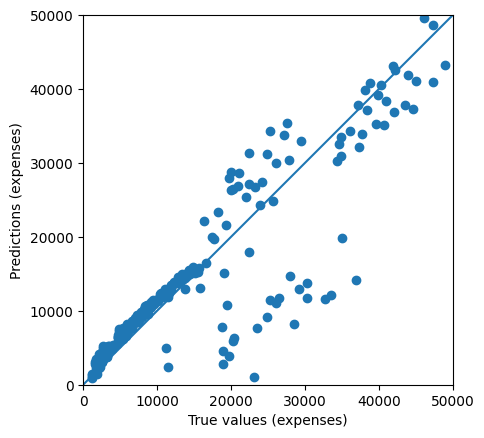

In [65]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)